# Análisis del mercado de criptomonedas

In [68]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [69]:
criptodf=pd.read_csv('criptoanalisisv2.csv', sep=';')

In [70]:
criptodf.head()

,Date,BTC,BTC1,BTC2,ETH,ETH1,ETH2,BNB,BNB1,BNB2,...,SPY1,SPY2,DBTC,DETH,DBNB,DXRP,DSOL,DLUNA,DDOT,DSPY
0,2018-01-08,15170.0,1.00,0.0,1149.0,1.00,0.0,18.3,1.00,0.0,...,1.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000
1,2018-01-09,14595.0,0.96,0.0,1300.0,1.13,0.0,17.4,0.95,0.0,...,1.002,0.0,-0.038,0.132,-0.046,-0.144,0.0,0.0,0.0,0.002
2,2018-01-10,14973.0,0.99,0.0,1256.0,1.09,0.0,17.4,0.95,0.0,...,1.001,0.0,0.026,-0.034,-0.001,-0.060,0.0,0.0,0.0,-0.002
3,2018-01-11,13406.0,0.88,0.0,1155.0,1.01,0.0,21.0,1.15,0.0,...,1.008,0.0,-0.105,-0.080,0.210,-0.012,0.0,0.0,0.0,0.007
4,2018-01-12,13981.0,0.92,0.0,1273.0,1.11,0.0,22.3,1.22,0.0,...,1.015,0.0,0.043,0.102,0.061,0.047,0.0,0.0,0.0,0.007


In [71]:
criptodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1019 non-null   object 
 1   BTC     1019 non-null   float64
 2   BTC1    1019 non-null   float64
 3   BTC2    1019 non-null   float64
 4   ETH     1019 non-null   float64
 5   ETH1    1019 non-null   float64
 6   ETH2    1019 non-null   float64
 7   BNB     1019 non-null   float64
 8   BNB1    1019 non-null   float64
 9   BNB2    1019 non-null   float64
 10  XRP     1019 non-null   float64
 11  XRP1    1019 non-null   float64
 12  XRP2    1019 non-null   float64
 13  SOL     1019 non-null   float64
 14  SOL1    1019 non-null   float64
 15  SOL2    1019 non-null   float64
 16  LUNA    1019 non-null   float64
 17  LUNA1   1019 non-null   float64
 18  LUNA2   1019 non-null   float64
 19  DOT     1019 non-null   float64
 20  DOT1    1019 non-null   float64
 21  DOT2    1019 non-null   float64
 22  

**Las variables son las siguientes:**
- 0. Date: La fecha, pero en formato objeto 
- 1. BTC: las cotizaciones de cierre en dolares de Bitcoin 
- 2. BTC1: las cotizaciones de cierre en dolares de Bitcoin, indexadas al numero 1 al 08 de enero de  2018
- 3. ETH: : las cotizaciones de cierre en dolares de Ethereum 
- 4. ETH1: las cotizaciones de cierre en dolares de Ethereum, indexadas al numero 1 al 08 de enero de  2018
- 5. BNB: las cotizaciones de cierre en dolares de Binance coin 
- 6. BNB1: las cotizaciones de cierre en dolares de Binance coin, indexadas al numero 1 al 08 de enero de  2018 
- 7. XRP:  las cotizaciones de cierre en dolares de la moneda XRP, plataforma Ripple 
- 8. XRP1: las cotizaciones de cierre en dolares de XRP, indexadas al numero 1 al 08 de enero de  2018  
- 9. SOL: las cotizaciones de cierre en dolares de la moneda Solana
- 10. SOL1: las cotizaciones de cierre en dolares de Solana desde el 29 de julio de 2019
- 11. LUNA: las cotizaciones de cierre en dolares de la moneda Luna, plataforma Terra
- 12. LUNA1: las cotizaciones de cierre en dolares de Luna desde el 13 de abril de 2020
- 13. DOT: las cotizaciones de cierre en dolares de la moneda Dot, plataforma Polkadot
- 14. DOT1: las cotizaciones de cierre en dolares de Dot desde el 20 de agosto de 2020
- 15. DBTC: las variaciones porcentuales diarias del precio del Bitcoin 
- 16. DETH: las variaciones porcentuales diarias del precio del Ethereum
- 17. DBNB: las variaciones porcentuales diarias del precio del Binance coin
- 18. DXRP: las variaciones porcentuales diarias del precio del XRP
- 19. DSOL: las variaciones porcentuales diarias del precio de Solana
- 20. DLUNA: las variacionenes porcentuales diarias del precio de Luna
- 21. DDOT: las variacionenes porcentuales diarias del precio de Polkadot


In [72]:
## convertir Date de objeto a datetime  
criptodf['date1'] = pd.to_datetime(criptodf['Date'], format='%Y-%m-%d')
## Nota, en caso no corra, revisar en Excle que el formato de la columna de fecha del archivo CSV es "inglés Estados Unidos"

In [73]:
criptodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1019 non-null   object        
 1   BTC     1019 non-null   float64       
 2   BTC1    1019 non-null   float64       
 3   BTC2    1019 non-null   float64       
 4   ETH     1019 non-null   float64       
 5   ETH1    1019 non-null   float64       
 6   ETH2    1019 non-null   float64       
 7   BNB     1019 non-null   float64       
 8   BNB1    1019 non-null   float64       
 9   BNB2    1019 non-null   float64       
 10  XRP     1019 non-null   float64       
 11  XRP1    1019 non-null   float64       
 12  XRP2    1019 non-null   float64       
 13  SOL     1019 non-null   float64       
 14  SOL1    1019 non-null   float64       
 15  SOL2    1019 non-null   float64       
 16  LUNA    1019 non-null   float64       
 17  LUNA1   1019 non-null   float64       
 18  LUNA2   

## Correlaciones entre distintos activos

In [74]:
## Hay data completa para todos los activos solo desde el 08 de noviembre de 2021, el día más alto de Bitcoin. Armamos un nuevo dataframe
filtered_df = criptodf.loc[(criptodf['date1'] >= '2021-11-08')]

In [75]:
filtered_df.head()

,Date,BTC,BTC1,BTC2,ETH,ETH1,ETH2,BNB,BNB1,BNB2,...,SPY2,DBTC,DETH,DBNB,DXRP,DSOL,DLUNA,DDOT,DSPY,date1
966,2021-11-08,67567.0,4.45,1.00,4812.0,4.19,1.00,654.3,35.83,1.00,...,1.00,0.105,0.073,0.075,0.104,0.051,0.084,0.028,0.001,2021-11-08
967,2021-11-09,66972.0,4.41,0.99,4735.0,4.12,0.98,635.2,34.79,0.97,...,1.00,-0.009,-0.016,-0.029,-0.018,-0.037,-0.072,-0.048,-0.003,2021-11-09
968,2021-11-10,64995.0,4.28,0.96,4636.0,4.04,0.96,615.3,33.70,0.94,...,0.99,-0.030,-0.021,-0.031,-0.052,-0.023,-0.029,-0.077,-0.008,2021-11-10
969,2021-11-11,64950.0,4.28,0.96,4730.0,4.12,0.98,629.9,34.50,0.96,...,0.99,-0.001,0.020,0.024,0.021,0.002,0.037,0.017,0.000,2021-11-11
970,2021-11-12,64156.0,4.23,0.95,4667.0,4.06,0.97,626.6,34.32,0.96,...,1.00,-0.012,-0.013,-0.005,-0.024,-0.024,-0.021,-0.037,0.008,2021-11-12


In [76]:
### filtrando solo las columnas para la matriz de correlaciones 
X_f=filtered_df.iloc[:, 25:33]

In [77]:
X_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 966 to 1018
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DBTC    53 non-null     float64
 1   DETH    53 non-null     float64
 2   DBNB    53 non-null     float64
 3   DXRP    53 non-null     float64
 4   DSOL    53 non-null     float64
 5   DLUNA   53 non-null     float64
 6   DDOT    53 non-null     float64
 7   DSPY    53 non-null     float64
dtypes: float64(8)
memory usage: 3.7 KB


In [78]:
X_f.describe().T

,count,mean,std,min,25%,50%,75%,max
DBTC,53.0,-0.009585,0.035771,-0.104,-0.031,-0.009,0.003,0.105
DETH,53.0,-0.000849,0.073625,-0.148,-0.037,-0.014,0.022,0.410
DBNB,53.0,0.006132,0.106256,-0.129,-0.032,-0.009,0.011,0.698
DXRP,53.0,0.006830,0.130109,-0.116,-0.039,-0.012,0.021,0.872
DSOL,53.0,0.001491,0.125670,-0.159,-0.041,-0.010,0.021,0.787
DLUNA,53.0,0.028623,0.160677,-0.158,-0.043,0.008,0.061,1.016
DDOT,53.0,-0.004415,0.103878,-0.160,-0.048,-0.025,0.031,0.601
DSPY,53.0,-0.001302,0.010148,-0.022,-0.009,-0.001,0.004,0.021


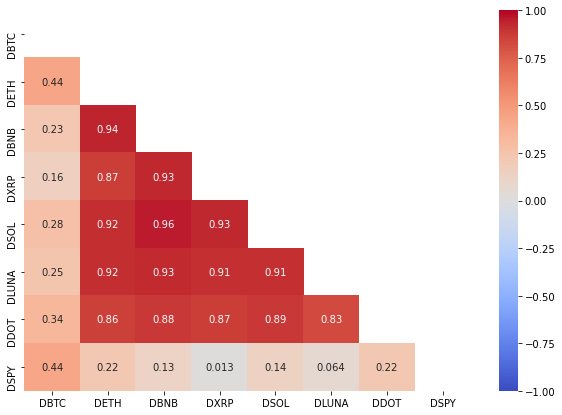

In [79]:
# We caluclate all correlations and assign them to corr_mat
corr_mat_f= X_f.corr()

# We plot a heatmap, using a mask that will give it a triangular form to avoid duplicating values. 
plt.figure(figsize=(10,7))
matrix_f = np.triu(corr_mat_f)
sns.heatmap(corr_mat_f, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, mask=matrix_f)
plt.show();

## Cotizaciones históricas BTC, ETH, SPY

In [81]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=criptodf['date1'], y=criptodf['BTC1'],
                    mode='lines',
                    name='Bitcoin'))

fig.add_trace(go.Scatter(x=criptodf['date1'], y=criptodf['ETH1'],
                    mode='lines',
                    name='Ethereum'))

fig.add_trace(go.Scatter(x=criptodf['date1'], y=criptodf['SPY1'],
                    mode='lines',
                    name='S&P500'))


chart_layout = go.Layout(width=1000, height=600, title='Cotizaciones diarias indexadas al 08 de enero de 2018',
                         xaxis_title='Fecha', yaxis_title='Múltiplo', barmode='overlay') 

fig.update_layout(chart_layout)

fig.show()

## Cotizaciones diarias indexadas a partir del 11.08.21

### BTC, ETH y S&P500

In [80]:

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['BTC2'],
                    mode='lines',
                    name='Bitcoin'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['ETH2'],
                    mode='lines',
                    name='Ethereum'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['SPY2'],
                    mode='lines',
                    name='S&P500'))


chart_layout = go.Layout(width=1000, height=600, title='Cotizaciones diarias indexadas al 08 de noviembre de 2021',
                         xaxis_title='Fecha', yaxis_title='Múltiplo', barmode='overlay') 

fig.update_layout(chart_layout)

fig.show()

### Altcoins

In [67]:

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['BTC2'],
                    mode='lines',
                    name='Bitcoin'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['ETH2'],
                    mode='lines',
                    name='Ethereum'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['BNB2'],
                    mode='lines',
                    name='Binance'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['SOL2'],
                    mode='lines',
                    name='Solana'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['LUNA2'],
                    mode='lines',
                    name='Luna'))

fig.add_trace(go.Scatter(x=filtered_df['date1'], y=filtered_df['DOT2'],
                    mode='lines',
                    name='Polkadot'))

chart_layout = go.Layout(width=1000, height=600, title='Cotizaciones diarias indexadas al 08 de noviembre de 2021',
                         xaxis_title='Fecha', yaxis_title='Múltiplo', barmode='overlay') 

fig.update_layout(chart_layout)

fig.show()

## S&P 500 histórico

In [116]:
marketdf=pd.read_csv('SP500.csv', sep=';')

In [117]:
marketdf.head()

,Year,year_open,year_high,year_low,year_close,annual_change,20year_multiple
0,2021,3701,4793,3701,4766,0.27,4.2
1,2020,3258,3756,2237,3756,0.16,2.8
2,2019,2510,3240,2448,3231,0.29,2.2
3,2018,2696,2931,2351,2507,-0.06,2.0
4,2017,2258,2690,2258,2674,0.19,2.8


In [118]:
marketdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             94 non-null     int64  
 1   year_open        94 non-null     int64  
 2   year_high        94 non-null     int64  
 3   year_low         94 non-null     int64  
 4   year_close       94 non-null     int64  
 5   annual_change    94 non-null     float64
 6   20year_multiple  94 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 5.3 KB


In [119]:
# Histograma rentabilidad anual S&P 500

fig = go.Figure()
xbins={'start':-40, 'end':40, 'size':5}

dsp500_hist_go = go.Histogram(x = marketdf['annual_change']*100, name='S&P500',
                            xbins=xbins, opacity=0.4, histnorm='percent')

fig.add_trace(dsp500_hist_go)

chart_layout = go.Layout(width=800, height=600, title='Histograma de rentabilidades anuales del S&P500 desde 1928',
                         xaxis_title='Rentabilidad anual (%)', yaxis_title='Frecuencia', barmode='overlay') 

fig.update_layout(chart_layout)

fig.show()

In [121]:
newdf=marketdf[marketdf['Year'] > 1947]

In [123]:
newdf

,Year,year_open,year_high,year_low,year_close,annual_change,20year_multiple
0,2021,3701,4793,3701,4766,0.27,4.2
1,2020,3258,3756,2237,3756,0.16,2.8
2,2019,2510,3240,2448,3231,0.29,2.2
3,2018,2696,2931,2351,2507,-0.06,2.0
4,2017,2258,2690,2258,2674,0.19,2.8
...,...,...,...,...,...,...,...
69,1952,24,27,23,27,0.12,3.9
70,1951,21,24,21,24,0.17,2.9
71,1950,17,20,17,20,0.22,1.3
72,1949,15,17,14,17,0.10,0.8


In [127]:
# Histograma rentabilidades de los ultimos 20 años

fig = go.Figure()
xbins={'start':0, 'end':14, 'size':1}

dsp500_hist_go = go.Histogram(x = newdf['20year_multiple'], name='Múltiplo de inversión de 20 años',
                            xbins=xbins, opacity=0.4, marker=dict(color="#4CB391"), histnorm='percent')

fig.add_trace(dsp500_hist_go)

chart_layout = go.Layout(width=800, height=600, title='Múltiplos de inversiones hold por 20 años - S&P 500 desde 1928',
                         xaxis_title='Múltiplo (X)', yaxis_title='Frecuencia', barmode='overlay') 
fig.update_layout(chart_layout)

fig.show()

------------------------